<a href="https://colab.research.google.com/github/rakeshp1/data690_rakesh/blob/main/Assignment_06/assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 06
### Note:
- For visualization, you should use Plotly Express 
- Use use this notebook as your template and follow the instructions

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

The links to the zip file is:

- https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources (The page containing link to the zip file)

- https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip (The link to download the zip file)

You can upload the zip file there or run `!wget` command to retrieve it directly, then run `!unzip` command to extract files.

You can also unzip and upload individual files to Colab. 

Your folder structure should look like this in your Colab enviroment:
```
- assignment_07.ipynb
- raw_data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
        - ...
```


In [1]:
!wget https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip

--2021-10-13 15:50:01--  https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip
Resolving ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)... 15.200.243.39, 15.205.92.235, 2600:1f12:18a:7d00:e2fd:78d3:a870:ea91, ...
Connecting to ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)|15.200.243.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385541173 (368M) [application/zip]
Saving to: ‘CollegeScorecard_Raw_Data_01192021.zip’

CollegeScorecard_Ra 100%[===================>] 367.68M  34.1MB/s    in 12s     

2021-10-13 15:50:13 (31.7 MB/s) - ‘CollegeScorecard_Raw_Data_01192021.zip’ saved [385541173/385541173]



In [2]:
!unzip CollegeScorecard_Raw_Data_01192021.zip

Archive:  CollegeScorecard_Raw_Data_01192021.zip
   creating: Raw Data Files/
  inflating: Raw Data Files/MERGED2011_12_PP.csv  
  inflating: Raw Data Files/MERGED1999_00_PP.csv  
  inflating: Raw Data Files/MERGED2006_07_PP.csv  
  inflating: Raw Data Files/MERGED2014_15_PP.csv  
  inflating: Raw Data Files/Most-Recent-Cohorts-All-Data-Elements.csv  
  inflating: __MACOSX/Raw Data Files/._Most-Recent-Cohorts-All-Data-Elements.csv  
  inflating: Raw Data Files/MERGED2003_04_PP.csv  
  inflating: Raw Data Files/MERGED1996_97_PP.csv  
  inflating: Raw Data Files/FieldOfStudyData1516_1617_PP.csv  
  inflating: Raw Data Files/Most-Recent-Cohorts-Field-of-Study.csv  
  inflating: Raw Data Files/MERGED2012_13_PP.csv  
  inflating: Raw Data Files/MERGED2005_06_PP.csv  
  inflating: Raw Data Files/MERGED2009_10_PP.csv  
  inflating: Raw Data Files/FieldOfStudyData1617_1718_PP.csv  
  inflating: Raw Data Files/MERGED2018_19_PP.csv  
  inflating: Raw Data Files/MERGED2017_18_PP.csv  
  inflating

In [115]:
# <1> 
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os


#(Write code here)


In [12]:
# <2> 
# Display the current workin directory using os.getcwd()
print(os.getcwd())
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder
a = '/content/Raw Data Files'
#(Write code here)
file = os.listdir(a)


/content


In [13]:
# <3> 
a = '/content/Raw Data Files'
#(Write code here)
file = os.listdir(a)

# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

#(Write code here)


In [16]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.
files = [file for file in file if 'MERGED' in file]
#(Write code here)
files

['MERGED2003_04_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2014_15_PP.csv']

In [61]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

df_list = []
def read(x):
    df = pd.read_csv(a+'/'+x,usecols=['UNITID','INSTNM','STABBR','REGION','ADM_RATE','TUITIONFEE_IN'])
    df['year'] = x.split('_')[0].replace('MERGED','')
    df_list.append(df)

for x in files:
    read(x)

In [42]:
df1 = pd.concat(df_list)

In [47]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)
print("The Number of observatiosn",df1.shape[0])



The Number of observatiosn 163331


In [48]:
df1.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'year'],
      dtype='object')

In [49]:
df1.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,2003
1,100654,Alabama A & M University,AL,5.0,0.4457,3352.0,2003
2,100663,University of Alabama at Birmingham,AL,5.0,0.8049,4274.0,2003
3,100690,Amridge University,AL,5.0,NaN,9440.0,2003
4,100706,University of Alabama in Huntsville,AL,5.0,0.8756,4126.0,2003


In [50]:
df1.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
7761,48065701,Rasmussen College - Overland Park,KS,4.0,NaN,10764.0,2014
7762,48154401,National Personal Training Institute of Cleveland,OH,3.0,NaN,NaN,2014
7763,48387801,Bay Area Medical Academy - San Jose Satellite ...,CA,8.0,NaN,NaN,2014
7764,48400201,High Desert Medical College - Bakerfield,CA,8.0,NaN,29932.0,2014
7765,48414501,Vantage College-San Antonio,TX,6.0,NaN,NaN,2014


In [51]:
df1.sample(n=5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
760,126012,The Wright Institute,CA,8.0,NaN,NaN,1996
7499,15492501,Coffeyville Technical Campus,KS,4.0,NaN,3370.0,2014
1670,156851,Henderson Community College,KY,5.0,NaN,1450.0,2001
2681,193609,Neighborhood Playhouse School of the Theater,NY,2.0,NaN,NaN,2010
934,138275,Warner University,FL,5.0,0.6639,13210.0,2006


In [52]:
df1.isnull().sum()

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118419
TUITIONFEE_IN     84136
year                  0
dtype: int64

In [54]:
df1.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44912.000000,79195.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871
std,4.571721e+06,2.189217,0.217058,9986.003542
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [59]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.
df_umbc=df1.query('INSTNM=="University of Maryland-Baltimore County"')
#(Write code here)


In [72]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)
df_umbc.shape[0]
#(Write code here)

23

In [73]:
df_umbc.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


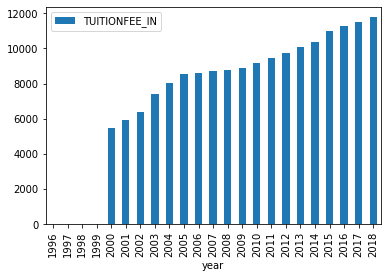

In [69]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart
df_umbc=df_umbc.sort_values(by='year')
df_umbc.plot(x="year", y=["TUITIONFEE_IN"], kind="bar")
#(Write code here)


In [74]:
df_umbc.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [76]:
df.sample(n=5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
4744,242130,ICPR Junior College-Arecibo,PR,9,NaN,4500.0
1645,157085,University of Kentucky,KY,5,0.8165,4547.0
6179,436748,New Hampshire Career Institute,NH,1,NaN,NaN
4838,245999,Francis Tuttle Technology Center,OK,6,NaN,NaN
756,129686,Lyme Academy College of Fine Arts,CT,1,0.9474,14404.0


In [79]:
df_umbc.isnull().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
year             0
dtype: int64

In [80]:
df_umbc.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


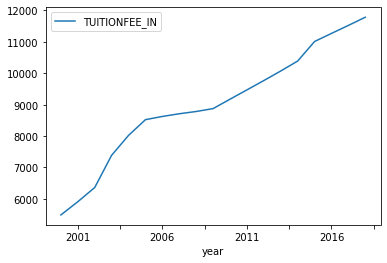

In [81]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart
df_umbc.plot(x="year", y=["TUITIONFEE_IN"], kind="line")
#(Write code here)


In [86]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List
tuition_list_umbc=df_umbc['TUITIONFEE_IN'].tolist()
df_umbc
#(Write code here)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,year
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [99]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one
tuition_list_umbc=df_umbc['TUITIONFEE_IN'].tolist()
for i in range(1,len(tuition_list_umbc)):
  percent_chnage=((tuition_list_umbc[i]-tuition_list_umbc[i-1])/tuition_list_umbc[i-1])*100
  print(percent_chnage)

nan
nan
nan
nan
7.650273224043716
7.648054145516074
16.12700408676517
8.554412560909583
6.234413965087282
1.1971830985915493
0.9974483878450475
0.8268259072117593
1.0478359908883828
3.370153291253381
3.227565151019518
3.1372134783986483
3.11347808275297
3.1386571315057608
5.989984591679507
2.344175904052335
2.254971590909091
2.2573363431151243


In [110]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity
pct_tuition_chnages_list=[]
for i in range(0,len(tuition_list_umbc)):
  percent_chnage=((tuition_list_umbc[i]-tuition_list_umbc[i-1])/tuition_list_umbc[i-1])*100
  pct_tuition_chnages_list.append(round(percent_chnage,2))
  print(round(percent_chnage,2))

nan
nan
nan
nan
nan
7.65
7.65
16.13
8.55
6.23
1.2
1.0
0.83
1.05
3.37
3.23
3.14
3.11
3.14
5.99
2.34
2.25
2.26


In [111]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.
df_umbc['PCT_CHANGE']=pct_tuition_chnages_list
#(Write code here)

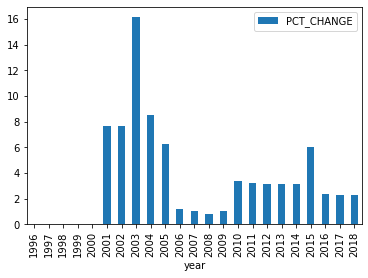

In [112]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart
df_umbc.plot(x="year", y=["PCT_CHANGE"], kind="bar")

# (write code here)



In [155]:
 # <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 
def pct_tuition_chnages():
  pct_tuition_chnages_list_JHU=[]
  for i in range(0,len(tuition_list_JHU)):
    percent_chnage=((tuition_list_JHU[i]-tuition_list_JHU[i-1])/tuition_list_JHU[i-1])*100
    pct_tuition_chnages_list_JHU.append(round(percent_chnage,2))
  return pct_tuition_chnages_list_JHU


In [160]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.
df_JHU = df1.query('INSTNM=="Johns Hopkins University"')
df_JHU=df_JHU.sort_values(by='year')
tuition_list_JHU=df_JHU['TUITIONFEE_IN'].tolist()
  

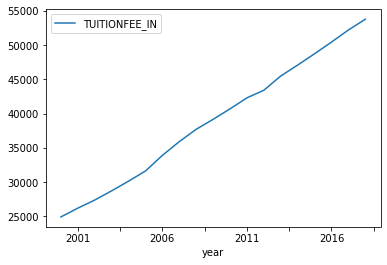

In [162]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together
df_JHU.plot(x="year", y=["TUITIONFEE_IN"], kind="line")



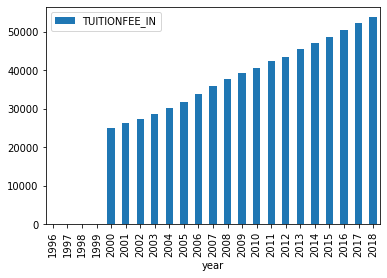

In [163]:
df_JHU.plot(x="year", y=["TUITIONFEE_IN"], kind="bar")


In [165]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier
PCT_CHANGES_JHU = pct_tuition_chnages()



In [166]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)
df_JHU['PCT_CHANGE']=PCT_CHANGES


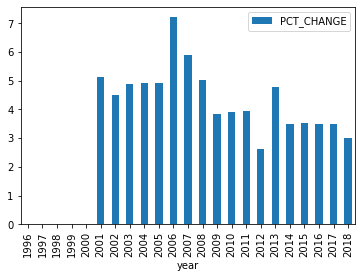

In [168]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)
df_JHU.plot(x="year", y=["PCT_CHANGE"], kind="bar")



In [ ]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)



In [ ]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)



In [ ]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)



In [ ]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)



In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)



In [ ]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)



In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots
#### blah, blah 
#### blah, blah
#### ...
#### blah, blah

In [ ]:
# The end.